 **Import necessary libraries**

In [2]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import nltk
import joblib
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report

In [5]:
# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

**Load the dataset**

In [6]:
df = pd.read_csv("C:\\Users\\HP\\Desktop\\Project\\CODE TEC INTERNSHIP\\NLP task\\Restaurant Reviews.csv")
df

,Review,Liked
0,Wow... Loved this place.,1.0
1,Crust is not good.,0.0
2,Not tasty and the texture was just nasty.,0.0
3,Stopped by during the late May bank holiday of...,1.0
4,The selection on the menu was great and so wer...,1.0
...,...,...
2215,The staff was untrained and unfamiliar with th...,NaN
2216,The portions were skimpy and left us hungry. 0,NaN
2217,The restaurant had unclean restrooms and unple...,NaN
2218,The waiters were slow and forgetful with our o...,NaN


In [7]:
df.columns

Index(['Review', 'Liked'], dtype='object')

In [8]:
df.shape

(2220, 2)

In [9]:
df=df.drop_duplicates()
df


,Review,Liked
0,Wow... Loved this place.,1.0
1,Crust is not good.,0.0
2,Not tasty and the texture was just nasty.,0.0
3,Stopped by during the late May bank holiday of...,1.0
4,The selection on the menu was great and so wer...,1.0
...,...,...
2209,The staff was unfriendly and lacked basic mann...,NaN
2210,The portions were insufficient and left us hun...,NaN
2211,The restaurant had unclean utensils and staine...,NaN
2212,The waiters were rude and dismissive of our co...,NaN


In [10]:
df.shape

(1610, 2)

**check For Missing Values.**

In [4]:
print(df.isnull().sum())

Review      0
Liked     103
dtype: int64


**Drop missing values**

In [ ]:
df = df.dropna()
df

,Review,Liked
0,Wow... Loved this place.,1.0
1,Crust is not good.,0.0
2,Not tasty and the texture was just nasty.,0.0
3,Stopped by during the late May bank holiday of...,1.0
4,The selection on the menu was great and so wer...,1.0
...,...,...
2105,The staff was unresponsive and didn't address ...,0.0
2107,The restaurant had dirty dishes and neglected ...,0.0
2111,The staff was slow and appeared disinterested.,0.0
2112,The portions were small and left us wanting more.,0.0


In [12]:
df.shape

(1527, 2)

**Text preprocessing function**

In [ ]:
def preprocess_text(text):
    text = text.lower()  # Lowercasing
    text = re.sub(r'[^a-zA-Z]', ' ', text)  # Remove special characters and numbers
    words = text.split()
    words = [word for word in words if word not in stopwords.words('english')]  # Remove stopwords
    return ' '.join(words)

In [19]:
# Apply preprocessing
df['Cleaned_Review'] = df['Review'].apply(preprocess_text)


C:\Users\HP\AppData\Local\Temp\ipykernel_1772\2555007559.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cleaned_Review'] = df['Review'].apply(preprocess_text)


**Train-test split**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df['Cleaned_Review'], df['Liked'], test_size=0.2, random_state=42)

**Vectorization using TF-IDF**

In [ ]:
tfidf = TfidfVectorizer(max_features=1000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

**Model implementing**

In [22]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'SVM': SVC()
}

**Train and evaluate each model**

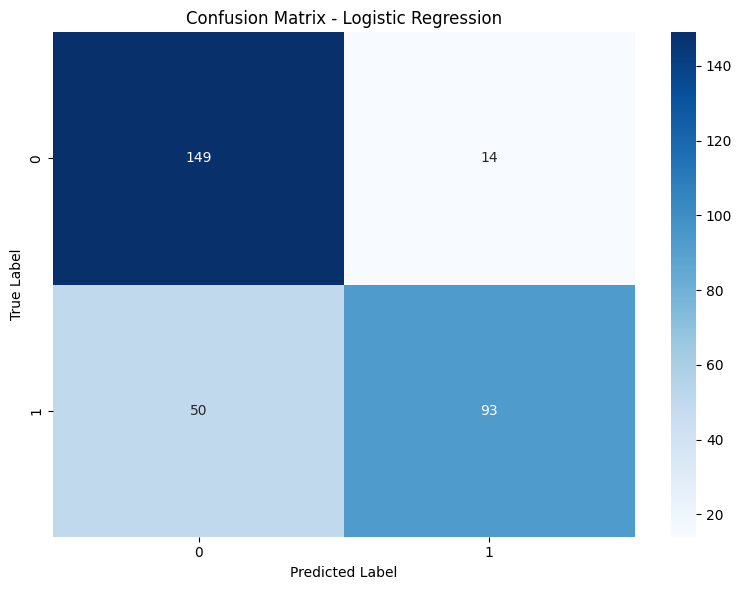


--- Logistic Regression Results ---
Training Accuracy: 0.94
Testing Accuracy: 0.79
              precision    recall  f1-score   support

         0.0       0.75      0.91      0.82       163
         1.0       0.87      0.65      0.74       143

    accuracy                           0.79       306
   macro avg       0.81      0.78      0.78       306
weighted avg       0.81      0.79      0.79       306

              precision    recall  f1-score   support

         0.0       0.75      0.91      0.82       163
         1.0       0.87      0.65      0.74       143

    accuracy                           0.79       306
   macro avg       0.81      0.78      0.78       306
weighted avg       0.81      0.79      0.79       306



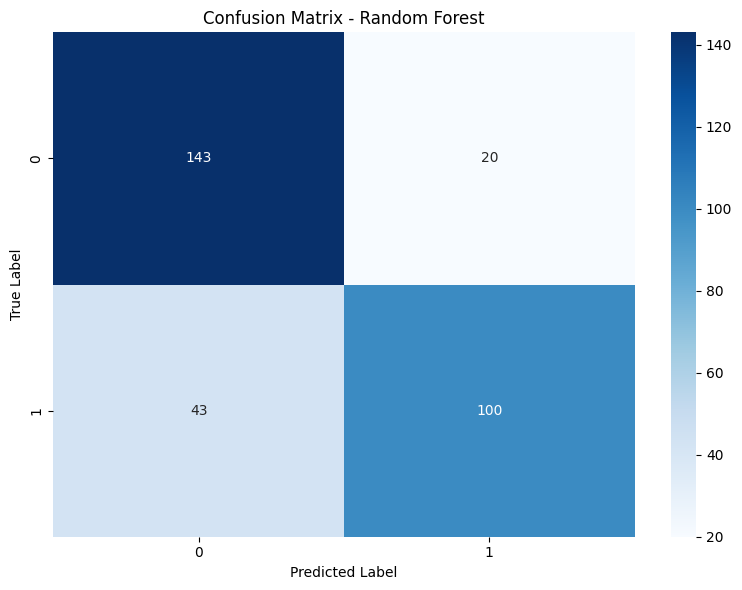


--- Random Forest Results ---
Training Accuracy: 0.99
Testing Accuracy: 0.79
              precision    recall  f1-score   support

         0.0       0.77      0.88      0.82       163
         1.0       0.83      0.70      0.76       143

    accuracy                           0.79       306
   macro avg       0.80      0.79      0.79       306
weighted avg       0.80      0.79      0.79       306

              precision    recall  f1-score   support

         0.0       0.77      0.88      0.82       163
         1.0       0.83      0.70      0.76       143

    accuracy                           0.79       306
   macro avg       0.80      0.79      0.79       306
weighted avg       0.80      0.79      0.79       306



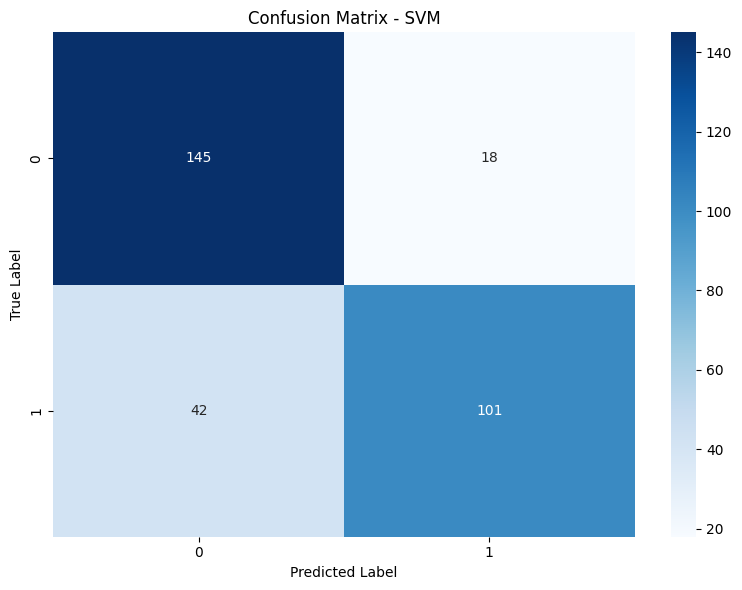


--- SVM Results ---
Training Accuracy: 0.99
Testing Accuracy: 0.80
              precision    recall  f1-score   support

         0.0       0.78      0.89      0.83       163
         1.0       0.85      0.71      0.77       143

    accuracy                           0.80       306
   macro avg       0.81      0.80      0.80       306
weighted avg       0.81      0.80      0.80       306

              precision    recall  f1-score   support

         0.0       0.78      0.89      0.83       163
         1.0       0.85      0.71      0.77       143

    accuracy                           0.80       306
   macro avg       0.81      0.80      0.80       306
weighted avg       0.81      0.80      0.80       306



In [ ]:
for model_name, model in models.items():
    # Train the model
    model.fit(X_train_tfidf, y_train)

    # Predictions
    y_train_pred = model.predict(X_train_tfidf)
    y_test_pred = model.predict(X_test_tfidf)


    # Evaluate model
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # classification report
    report = classification_report(y_test, y_test_pred)

    # Visualize Confusion Matrix
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, y_test_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()

    # Print detailed results
    print(f"\n--- {model_name} Results ---")
    print(f'Training Accuracy: {train_accuracy:.2f}')
    print(f'Testing Accuracy: {test_accuracy:.2f}')
    print(classification_report(y_test, y_test_pred))
    print(report)

**Save the trained models and TF-IDF vectorizer**

In [ ]:
joblib.dump(models['Logistic Regression'], 'logistic_model.pkl')
joblib.dump(models['Random Forest'], 'random_forest_model.pkl')
joblib.dump(models['SVM'], 'svm_model.pkl')
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']